In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from sklearn.datasets import make_classification
import json
import plotly.figure_factory as ff
import plotly.subplots as sp
from sklearn.metrics import RocCurveDisplay
import plotly.colors as pc
import shap

In [32]:
df = pd.read_csv('gdp.csv')
df.head()

,Country,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Afghanistan,2367.0,2556.0,2953.0,3300.0,3698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4367.0,4553.0,5146.0,6167.0,6925.0,8556.0,10297.0,12066.0,15325.0,17890.0,20293.0,20170.0,20616.0,20057.0,18020.0,18883.0,18336.0,18876.0,20136.0,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,2610.0,2686.0,2761.0,2842.0,2372.0,1969.0,2256.0,2323.0,2347.0,2317.0,2366.0,2617.0,2597.0,2560.0,2812.0,2247.0,1349.0,853.0,1478.0,2389.0,2916.0,3238.0,2251.0,2585.0,3264.0,3529.0,3974.0,4408.0,5628.0,7263.0,8148.0,9002.0,10804.0,13035.0,12187.0,12079.0,13052.0,12470.0,12936.0,13404.0,11525.0,12003.0,13209.0,15337.0,15582.0,15271.0,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,15591.0,17790.0,21038.0,26433.0,33276.0,45957.0,48156.0,48599.0,51582.0,55906.0,66346.0,66783.0,68698.0,56070.0,57041.0,67171.0,50650.0,53414.0,55309.0,46044.0,45654.0,50945.0,52287.0,52297.0,53011.0,59418.0,59413.0,61516.0,73482.0,91914.0,107047.0,123084.0,142483.0,180384.0,150317.0,177785.0,218332.0,227144.0,229701.0,238943.0,187494.0,180764.0,190004.0,194507.0,193361.0,164774.0,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,279.0,288.0,321.0,390.0,521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429.0,1547.0,1758.0,2362.0,2896.0,3158.0,3456.0,3952.0,4082.0,3675.0,3446.0,3625.0,3189.0,3193.0,3267.0,2789.0,2895.0,2993.0,3217.0,3155.0,2885.0,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,4147.0,3981.0,4344.0,4845.0,5380.0,8730.0,8170.0,8170.0,8514.0,9025.0,11119.0,10411.0,11900.0,12909.0,15017.0,16529.0,16022.0,12354.0,8966.0,6529.0,8148.0,10510.0,12344.0,10464.0,9895.0,12646.0,12378.0,17312.0,20342.0,26998.0,41397.0,58654.0,73038.0,98790.0,81705.0,95547.0,125552.0,143573.0,153761.0,164448.0,131661.0,114764.0,139835.0,114189.0,94671.0,66521.0,84375.0,142442.0,109764.0,115946.0,113343.0


In [33]:
df.shape

(205, 52)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  205 non-null    object 
 1   1975     175 non-null    float64
 2   1976     175 non-null    float64
 3   1977     175 non-null    float64
 4   1978     175 non-null    float64
 5   1979     175 non-null    float64
 6   1980     144 non-null    float64
 7   1981     145 non-null    float64
 8   1982     145 non-null    float64
 9   1983     145 non-null    float64
 10  1984     145 non-null    float64
 11  1985     146 non-null    float64
 12  1986     147 non-null    float64
 13  1987     147 non-null    float64
 14  1988     147 non-null    float64
 15  1989     147 non-null    float64
 16  1990     152 non-null    float64
 17  1991     153 non-null    float64
 18  1992     169 non-null    float64
 19  1993     171 non-null    float64
 20  1994     173 non-null    float64
 21  1995     178 non

In [35]:
df.describe()

,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
count,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.440000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.460000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.520000e+02,1.530000e+02,1.690000e+02,1.710000e+02,1.730000e+02,1.780000e+02,1.790000e+02,1.800000e+02,1.810000e+02,1.810000e+02,1.910000e+02,1.920000e+02,1.930000e+02,1.930000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,3.671487e+04,3.963197e+04,4.460598e+04,5.286942e+04,6.083084e+04,7.801524e+04,7.950234e+04,7.800978e+04,8.010141e+04,8.295717e+04,8.601055e+04,1.006563e+05,1.158771e+05,1.302963e+05,1.370871e+05,1.489365e+05,1.547077e+05,1.500451e+05,1.525503e+05,1.621236e+05,1.756982e+05,1.796014e+05,1.780079e+05,1.761493e+05,1.824203e+05,1.787959e+05,1.766236e+05,1.815049e+05,2.038269e+05,2.282481e+05,2.473339e+05,2.679612e+05,3.025515e+05,3.321713e+05,3.146915e+05,3.443135e+05,3.804191e+05,3.878378e+05,3.993130e+05,4.101716e+05,3.872776e+05,3.939335e+05,4.190543e+05,4.449832e+05,4.514229e+05,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.469311e+05,1.606174e+05,1.797714e+05,2.099625e+05,2.345962e+05,2.775326e+05,3.006549e+05,3.067802e+05,3.307515e+05,3.621634e+05,3.866957e+05,4.307443e+05,4.746090e+05,5.268753e+05,5.552619e+05,5.847063e+05,6.177428e+05,6.310839e+05,6.631317e+05,7.074611e+05,7.518437e+05,7.529405e+05,7.621684e+05,7.805528e+05,8.317471e+05,8.552017e+05,8.582192e+05,8.793094e+05,9.370717e+05,1.008513e+06,1.067530e+06,1.125575e+06,1.198706e+06,1.255695e+06,1.233106e+06,1.306701e+06,1.400629e+06,1.461819e+06,1.516676e+06,1.586660e+06,1.619425e+06,1.661602e+06,1.752417e+06,1.878009e+06,1.944287e+06,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.200000e+01,3.000000e+01,3.300000e+01,3.100000e+01,3.400000e+01,2.600000e+01,2.600000e+01,3.000000e+01,3.800000e+01,3.800000e+01,3.700000e+01,4.100000e+01,6.200000e+01,5.900000e+01,6.700000e+01,6.900000e+01,8.100000e+01,8.000000e+01,7.300000e+01,7.700000e+01,1.500000e+01,1.400000e+01,1.700000e+01,2.000000e+01,2.300000e+01,2.300000e+01,2.400000e+01,2.500000e+01,3.200000e+01,2.800000e+01,3.300000e+01,4.000000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.700000e+01,4.100000e+01,4.500000e+01,4.800000e+01,5.400000e+01,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,5.850000e+02,6.850000e+02,7.015000e+02,8.000000e+02,8.700000e+02,1.987750e+03,1.695000e+03,1.548000e+03,1.767000e+03,1.579000e+03,1.807750e+03,2.008500e+03,2.256500e+03,2.330500e+03,2.336000e+03,2.518250e+03,2.528000e+03,2.015000e+03,2.163500e+03,2.164000e+03,2.365250e+03,2.874500e+03,2.549500e+03,2.585000e+03,2.646000e+03,1.963000e+03,1.991750e+03,2.301000e+03,2.854000e+03,3.180250e+03,3.399750e+03,4.011500e+03,4.784750e+03,5.703750e+03,5.497250e+03,6.887750e+03,6.833500e+03,7.623000e+03,8.098500e+03,8.651500e+03,8.201500e+03,7.562000e+03,8.597500e+03,8.954500e+03,9.860500e+03,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,2.610000e+03,2.814000e+03,3.139000e+03,3.020000e+03,3.709000e+03,7.327000e+03,7.578000e+03,8.170000e+03,7.898000e+03,7.891000e+03,6.633500e+03,6.746000e+03,8.149000e+03,7.605000e+03,8.550000e+03,7.493500e+03,6.984000e+03,7.158000e+03,7.349000e+03,8.004000e+03,8.544000e+03,8.794000e+03,9.970500e+03,1.025100e+04,1.050200e+04,9.448000e+03,9.423500e+03,9.972000e+03,1.142900e+04,1.359050e+04,1.543400e+04

In [36]:
df.columns.tolist()

['Country',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025']

In [37]:
df.isna().sum()

Country     0
1975       30
1976       30
1977       30
1978       30
1979       30
1980       61
1981       60
1982       60
1983       60
1984       60
1985       59
1986       58
1987       58
1988       58
1989       58
1990       53
1991       52
1992       36
1993       34
1994       32
1995       27
1996       26
1997       25
1998       24
1999       24
2000       14
2001       13
2002       12
2003       12
2004       11
2005       11
2006       11
2007       11
2008       11
2009       11
2010       11
2011       10
2012       10
2013       10
2014       10
2015       10
2016       10
2017       10
2018       10
2019       10
2020        9
2021       11
2022       11
2023       11
2024       13
2025       16
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.isnull().sum()

Country     0
1975       30
1976       30
1977       30
1978       30
1979       30
1980       61
1981       60
1982       60
1983       60
1984       60
1985       59
1986       58
1987       58
1988       58
1989       58
1990       53
1991       52
1992       36
1993       34
1994       32
1995       27
1996       26
1997       25
1998       24
1999       24
2000       14
2001       13
2002       12
2003       12
2004       11
2005       11
2006       11
2007       11
2008       11
2009       11
2010       11
2011       10
2012       10
2013       10
2014       10
2015       10
2016       10
2017       10
2018       10
2019       10
2020        9
2021       11
2022       11
2023       11
2024       13
2025       16
dtype: int64

In [41]:
df_filled = df.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
print(df.head())
print(df.describe())

       Country     1975     1976  ...      2023      2024      2025
0  Afghanistan   2367.0   2556.0  ...   17248.0       NaN       NaN
1      Albania   2610.0   2686.0  ...   23388.0   27259.0   28372.0
2      Algeria  15591.0  17790.0  ...  247789.0  264913.0  268885.0
3      Andorra    279.0    288.0  ...    3786.0    4038.0    4035.0
4       Angola   4147.0   3981.0  ...  109764.0  115946.0  113343.0

[5 rows x 52 columns]
               1975          1976  ...          2024          2025
count  1.750000e+02  1.750000e+02  ...  1.920000e+02  1.890000e+02
mean   3.671487e+04  3.963197e+04  ...  5.756871e+05  5.991414e+05
std    1.469311e+05  1.606174e+05  ...  2.573189e+06  2.693421e+06
min    4.000000e+00  4.000000e+00  ...  6.500000e+01  6.500000e+01
25%    5.850000e+02  6.850000e+02  ...  1.350050e+04  1.421400e+04
50%    2.610000e+03  2.814000e+03  ...  4.713550e+04  4.782900e+04
75%    1.365450e+04  1.562600e+04  ...  2.915108e+05  3.032930e+05
max    1.623400e+06  1.809100e+06

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_34825/2569317551.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_34825/2569317551.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_34825/2569317551.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



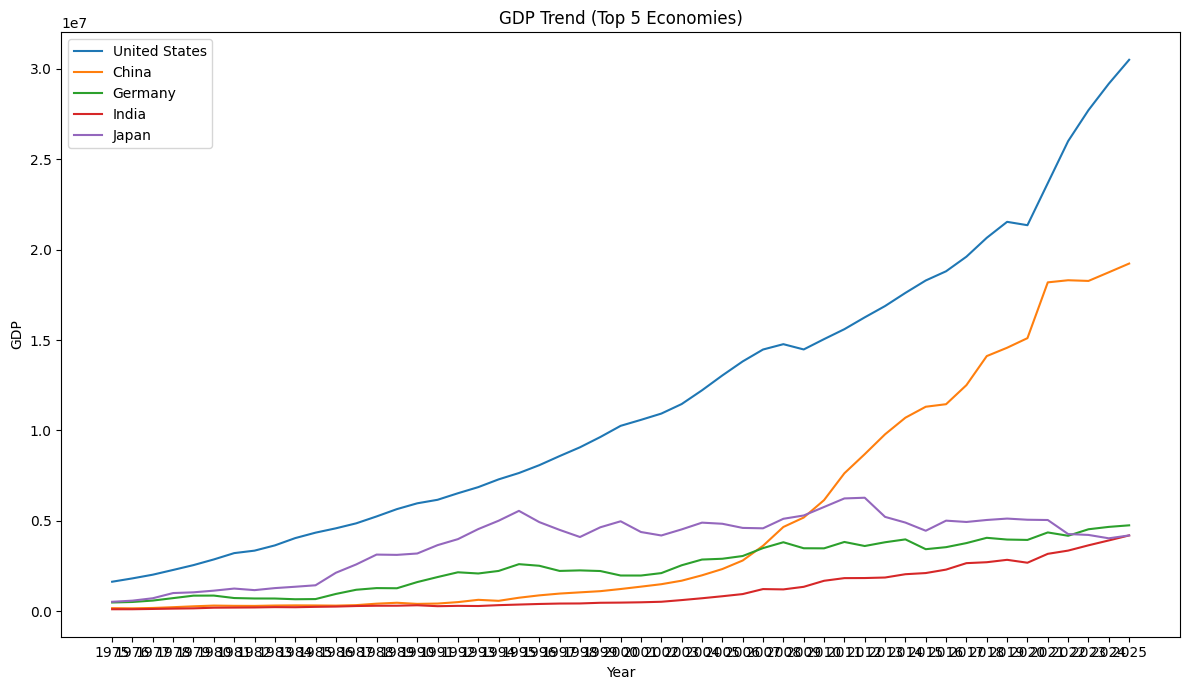

In [42]:
years = [col for col in df.columns if col != 'Country']
latest_year = max(years)
top5_countries = df_filled.sort_values(by=latest_year, ascending=False).head(5)['Country'].tolist()
plt.figure(figsize=(12, 7))
for country in top5_countries:
    plt.plot(years, df_filled[df_filled['Country'] == country][years].values.flatten(), label=country)
plt.legend()
plt.title('GDP Trend (Top 5 Economies)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.tight_layout()
plt.show()

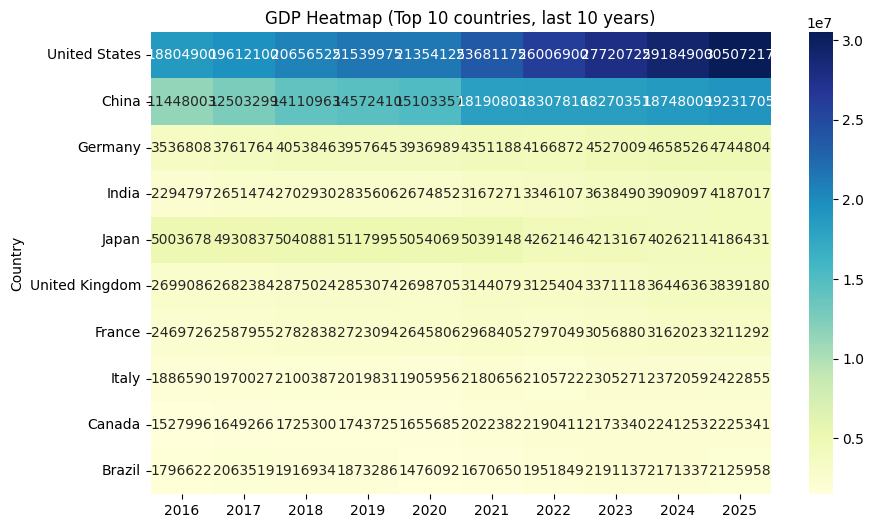

In [43]:
top10 = df_filled.sort_values(by=latest_year, ascending=False).head(10)
recent_years = years[-10:]
gdp_matrix = top10.set_index('Country')[recent_years]
plt.figure(figsize=(10, 6))
sns.heatmap(gdp_matrix, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('GDP Heatmap (Top 10 countries, last 10 years)')
plt.show()

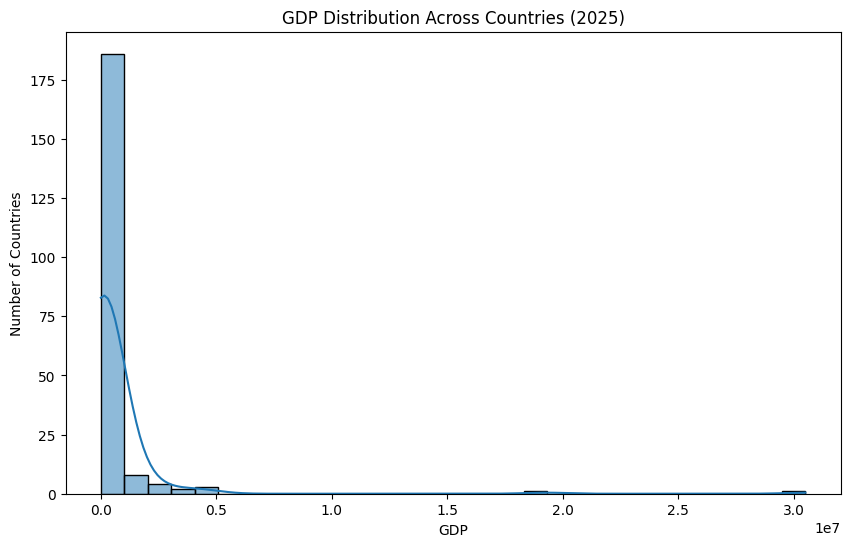

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filled[latest_year], bins=30, kde=True)
plt.title(f'GDP Distribution Across Countries ({latest_year})')
plt.xlabel('GDP')
plt.ylabel('Number of Countries')
plt.show()

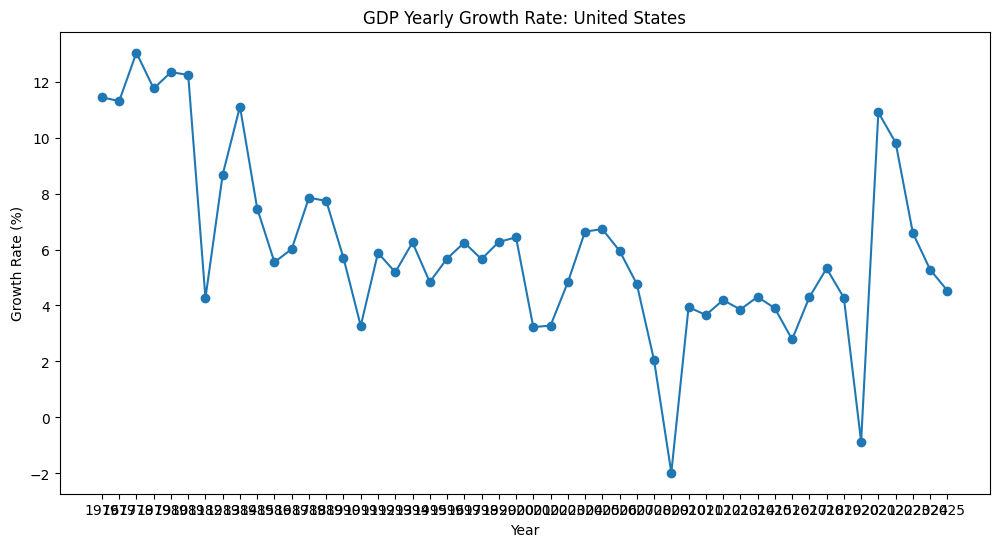

In [45]:
target_country = 'United States'
if target_country in df_filled['Country'].values:
    gdp_values = df_filled[df_filled['Country'] == target_country][years].values.flatten().astype(float)
    growth_rate = 100 * (np.diff(gdp_values) / gdp_values[:-1])
    plt.figure(figsize=(12, 6))
    plt.plot(years[1:], growth_rate, marker='o')
    plt.title(f"GDP Yearly Growth Rate: {target_country}")
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.show()

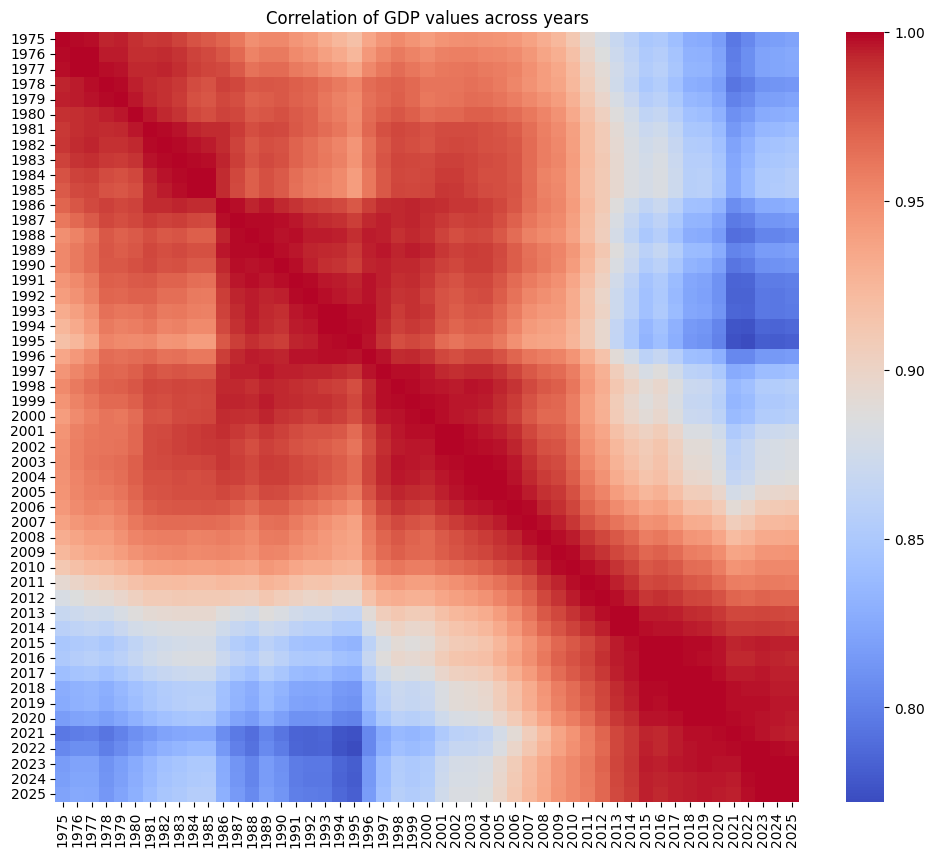

In [46]:
gdp_years_only = df_filled[years].apply(pd.to_numeric, errors='coerce')
corr = gdp_years_only.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation of GDP values across years')
plt.show()

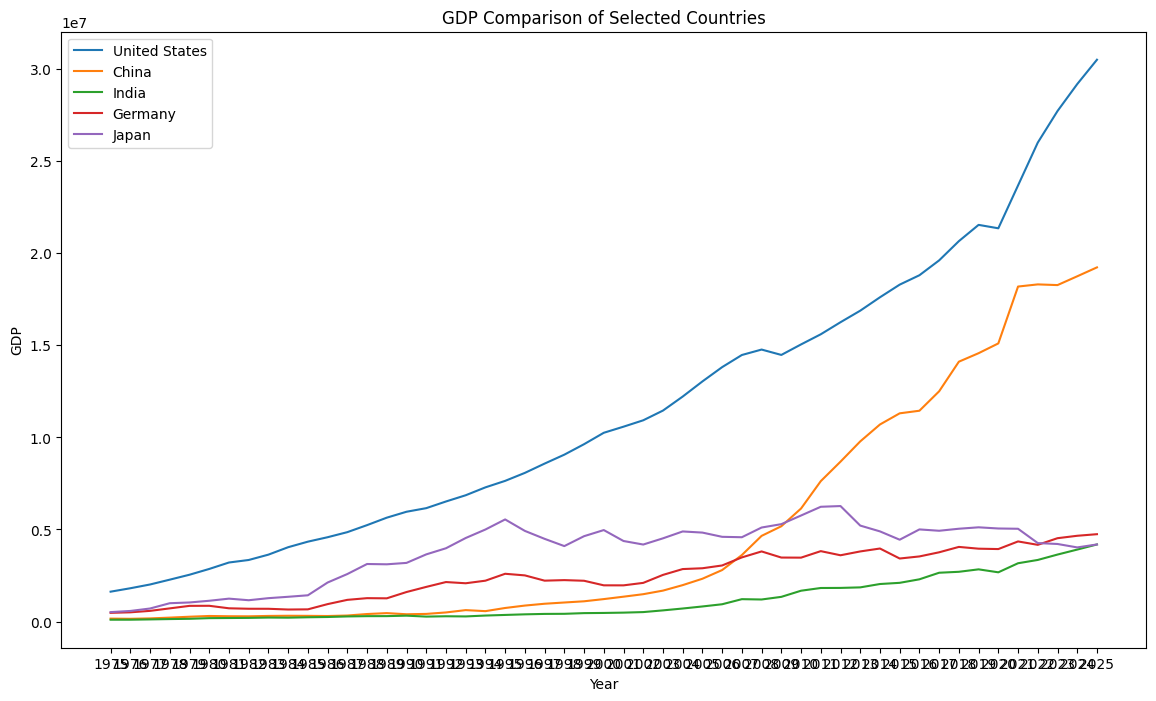

In [47]:
compare_countries = ['United States', 'China', 'India', 'Germany', 'Japan']
plt.figure(figsize=(14, 8))
for country in compare_countries:
    if country in df_filled['Country'].values:
        gdp = df_filled[df_filled['Country'] == country][years].values.flatten().astype(float)
        plt.plot(years, gdp, label=country)
plt.legend()
plt.title('GDP Comparison of Selected Countries')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

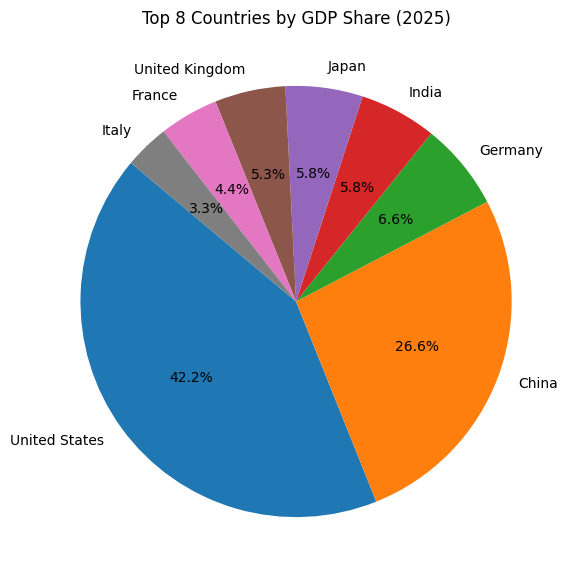

In [48]:
top_n = 8
top_countries = df_filled.sort_values(by=latest_year, ascending=False).head(top_n)
plt.figure(figsize=(10, 7))
plt.pie(top_countries[latest_year], labels=top_countries['Country'], autopct='%.1f%%', startangle=140)
plt.title(f'Top {top_n} Countries by GDP Share ({latest_year})')
plt.show()

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_34825/3544793613.py:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



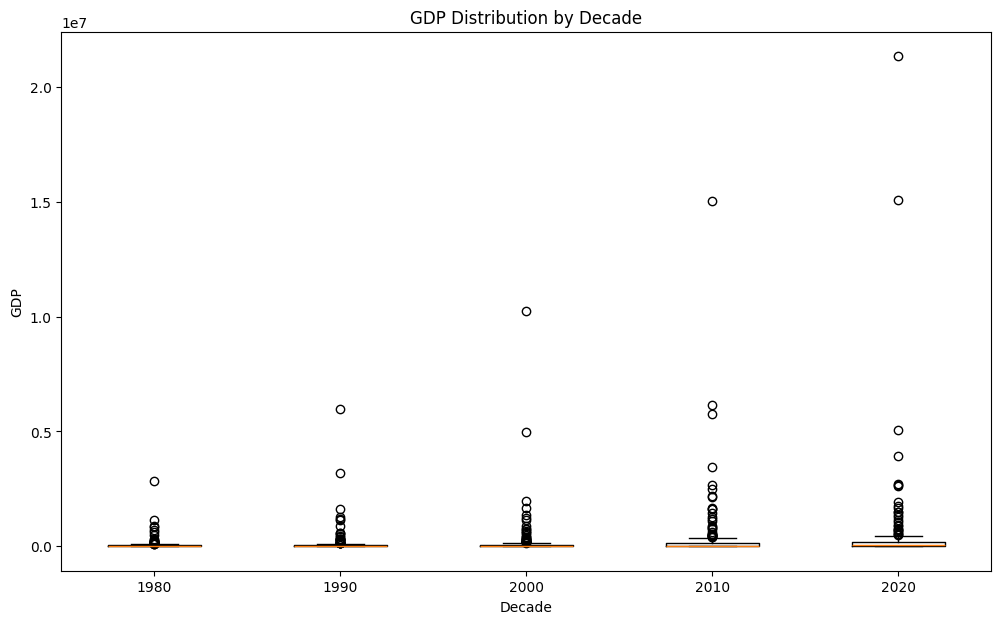

In [49]:
decades = ['1980', '1990', '2000', '2010', '2020']
plt.figure(figsize=(12, 7))
data = [pd.to_numeric(df_filled[decade], errors='coerce').dropna() for decade in decades]
plt.boxplot(data, labels=decades)
plt.title('GDP Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('GDP')
plt.show()


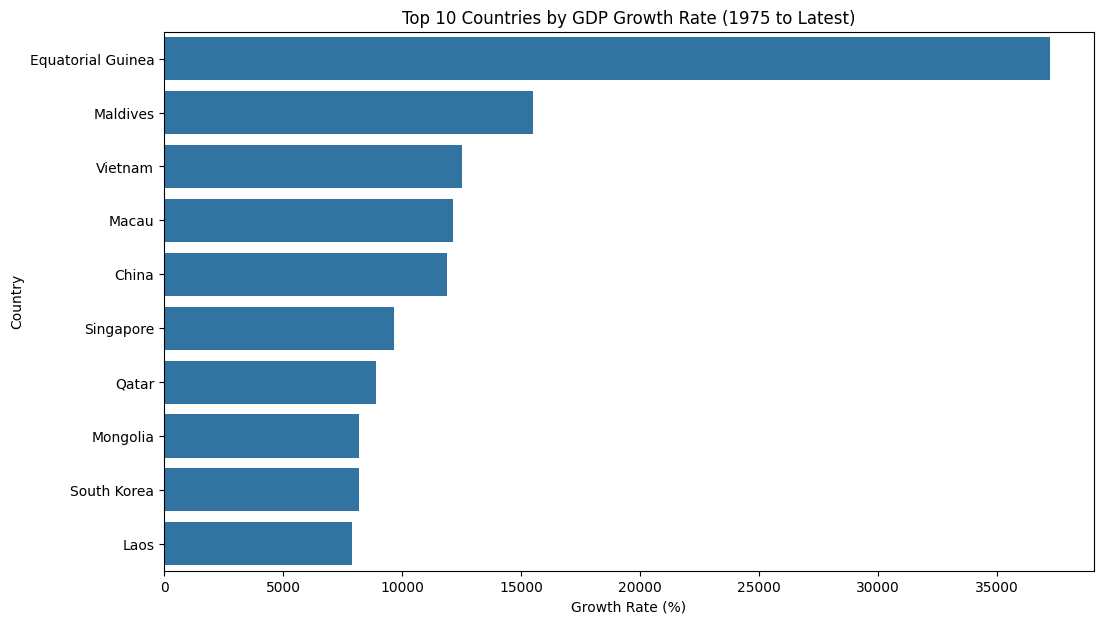

In [50]:
growth_rates = {}
for idx, row in df_filled.iterrows():
    country = row['Country']
    gdp_start = pd.to_numeric(row['1975'], errors='coerce')
    gdp_end = pd.to_numeric(row[latest_year], errors='coerce')
    if pd.notnull(gdp_start) and pd.notnull(gdp_end) and gdp_start != 0:
        growth = ((gdp_end - gdp_start) / gdp_start) * 100
        growth_rates[country] = growth
top_growth = sorted(growth_rates.items(), key=lambda x: x[1], reverse=True)[:10]
countries = [x[0] for x in top_growth]
growth_vals = [x[1] for x in top_growth]

plt.figure(figsize=(12, 7))
sns.barplot(x=growth_vals, y=countries)
plt.title('Top 10 Countries by GDP Growth Rate (1975 to Latest)')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.show()
